In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.data.get_data_yahoo('ibm',start='2020-01-01',end='2020-03-01')

In [4]:
df.index

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [5]:
df.reset_index(level=0, inplace=True)

In [6]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,134.119995,132.399994,132.529999,134.039993,3777500.0,130.899277
1,2020-01-02,135.919998,134.770004,135.000000,135.419998,3148600.0,132.246933
2,2020-01-03,134.860001,133.559998,133.570007,134.339996,2373700.0,131.192245
3,2020-01-06,134.240005,133.199997,133.419998,134.100006,2425500.0,130.957886
4,2020-01-07,134.960007,133.399994,133.690002,134.190002,3090800.0,131.045761


In [7]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,41.000000,41.000000,41.000000,41.000000,4.100000e+01,41.000000
mean,144.037074,141.451951,142.736340,142.763170,5.736034e+06,139.969169
std,7.933822,7.583840,7.788980,7.805735,3.756710e+06,8.034823
min,131.089996,126.360001,129.979996,130.149994,2.373700e+06,128.427628
25%,137.139999,135.309998,136.279999,136.619995,3.531000e+06,133.418823
50%,143.919998,139.600006,142.899994,139.750000,4.346000e+06,137.266495
75%,151.380005,149.509995,150.210007,150.699997,6.099200e+06,148.705673
max,158.750000,155.419998,156.820007,156.759995,1.899460e+07,153.254669


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
Date         41 non-null datetime64[ns]
High         41 non-null float64
Low          41 non-null float64
Open         41 non-null float64
Close        41 non-null float64
Volume       41 non-null float64
Adj Close    41 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.4 KB


<Figure size 864x576 with 0 Axes>

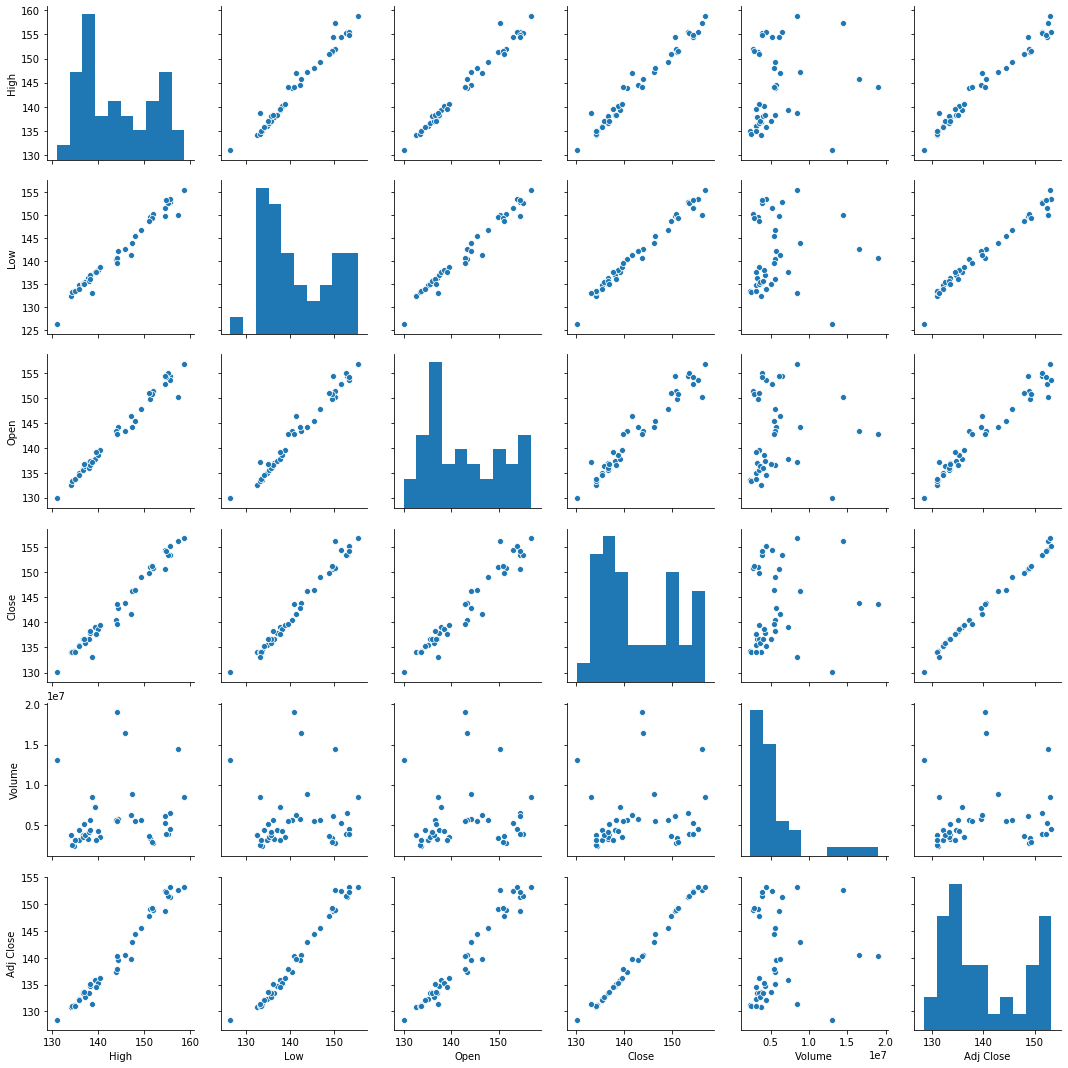

In [9]:
plt.figure(figsize=(12,8))
sns.pairplot(df.drop('Date',axis=1))

In [10]:
#columns
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [11]:
x = df.drop(['Date','Close'],axis=1)

In [12]:
y = df['Close']

In [13]:
train_data = 30

In [14]:
x_train = x[:train_data+1]

In [15]:
y_train = y[:train_data+1]

In [16]:
x_test = x[train_data:]

In [17]:
y_test = y[train_data:]

In [18]:
scaler = StandardScaler()

In [19]:
svr = SVR(kernel='poly')

In [20]:
# initialising pipeling
regr = make_pipeline(scaler,svr )


In [21]:
# training model
model = regr.fit(x_train, y_train)

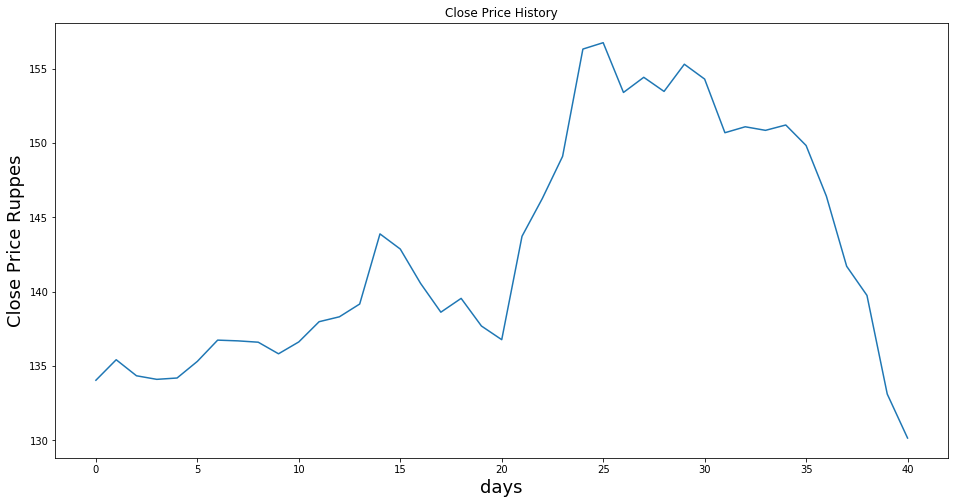

In [22]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('days', fontsize=18)
plt.ylabel('Close Price Ruppes', fontsize=18)
plt.show()

In [23]:
y_pred = model.predict(x_test)

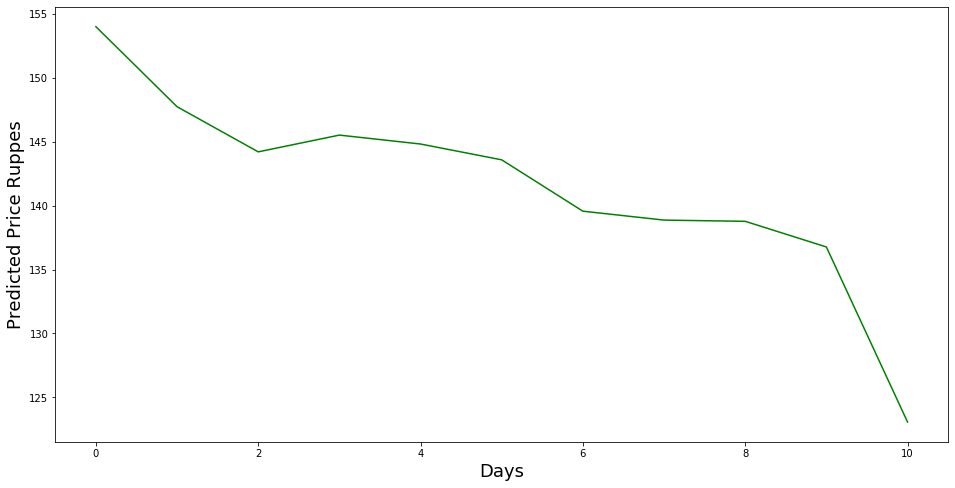

In [24]:
plt.figure(figsize=(16,8))
plt.plot(y_pred,color='green')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Predicted Price Ruppes', fontsize=18)
plt.show()

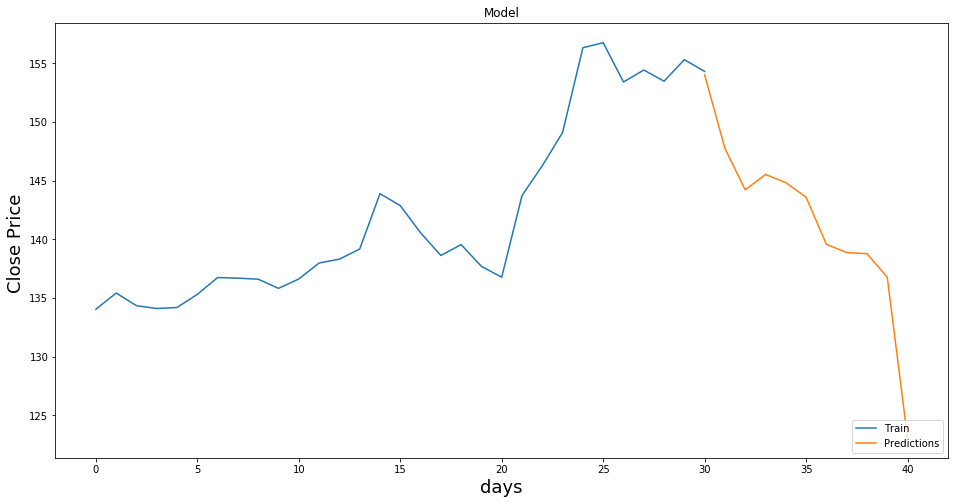

In [26]:
# Plot the data
train = df.loc[:30]
valid = df.loc[30:]
valid['Predictions'] = y_pred
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('days', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Predictions']])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()